





# Investigate TMDb Movie Dataset (Python Data Analysis Project)

The primary goal of the project is to go through the general data analysis process — using basic data analysis technique with NumPy, pandas, and Matplotlib. It contains four parts:

1. Questions Asking
2. Data Wrangling
3. Exploratory Data Analysis
4. Drawing Conclusion.


The movie dataset, which is originally from Kaggle, was cleaned and provided by Udacity. According Kaggle introduction page, the data contains information that are provided from The Movie Database (TMDb). These metrics can be seen as how successful these movies are. The movie basic information contained like cast, director, keywords, runtime, genres, etc. (Remark: The dataset on Kaggle page may be updated to new version).The survey of data which has been taken covers from year 1960 to 2015.

# Introduction

Overview
To complete my Data Analysis project I am using TMDb movies dataset.

This data set contains information about 9 to 10 thousand movies collected from The Movie Database (TMDb), including user ratings and revenue. It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.

Question that can analyised from this data set:

1.Movies which had most and least profit

2.Movies with largest and lowest budgets

3.Movies with most and least earned revenu.

4.Movies with longest and shortest runtime values

5.Average runtime of all the movies.

6.In which year we had most no.of profitable movies.






I have various obseravtions w.r.t various data collected or selected above.The observations are listed below

Successful genres (with respest to the profitable movies).

Most frequent cast (with respest to the profitable movies)

Average budget (with respest to the profitable movies)

Average revenue (with respest to the profitable movies)

Average duration of the movie (with respest to the profitable movies)

## Data wrangling:

Cleaning Decision

In this process the main idea is to take a quick glance on the data set, find the potential unreasonable data value, unnecessary variables for my research question, null data or duplicates, and then make data clearing decisions.

1.Basic Exploration:

First, let’s look what the dataset looks like for preceding investigating. Import the necessary package and use pd.read_csv to load the movie dataset, then print the few rows.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
# Import statements for all of the packages that I plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
#loading the csv files hnece sortimg the variables "df"
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06-09-2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04-01-2015,2947,7.3,2015,174799923.1,1.385749e+09


We can see that these data are pretty neat, except that the cast, keywords, genres and production_companies, they are strings format but contains with multiple values and separated by| character.
So basically i separate these things in the next following steps as discussed below.

2.Null values and zero values:

Then, use info to find the basic information like data format, the number of null values in each column in the dataset.

In [3]:
#see the column info and null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

From the table above, there are totally 10866 entries and total 21 columns. Each data format are reasonable, and there exists some null value in the cast, director, overview and genres columns, but just in tiny amounts, so I decided to drop them. However, some columns are with a lot of null values like homepage, tagline, keywords and production_companies, especially the homepage and tagline column are even not necessary for answering the questions, so I decide to drop both of the columns on the stage,but I kept the keywords and production_companies in case I drop too much data.

Please find the sorted data above 

Now we are trying to find out the descriptive statistics for dataset

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


As the table shown above, we can find outliers in popularity data because the max value is 32.98 while other quantiles are just around 0.2 to 0.7. Then I found the forum, which mentioned the popularity score is measured by counting unique views on the website or counting number of favorites and number of watched list, etc. And it has no upper-bond. I think how they measure the popularity matrices is just like a cumulative concept — more higher means more popular, no upper bond looks like reasonable, so I decided to retain the original data.

Also, there are a lot of zero number in budget and revenue data, accounted at least 50% of each columns. And there are some zero inruntime.

By Looking at the data in release_year column, I find all movies in the dataset are released because the minimum value is 1960 and there is no null value or zero for it. So I assume the zero values in the budget and revenue are missing data. But under the risk that these zero values may be just small values and record as “0”, I went on taking look for some zero data to decide whether it is just a missing value or small value.

In [5]:
#filter the zero budget data
df_budget_zero = df.query('budget == 0')
# choice the first three randomly
df_budget_zero.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,09-03-2015,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04


Among the budget data in zero values, I randomly chose Mr. Holmes and google searched it. And I found it's Wikipedia page and there is definitely a budget record in $10 million. And I also found the record for revenue data in other website resource for Wild Card. They are not in a small quantities. Hence, I assume the zero value in revenue and budget column are missing in the dataset. I had better to set them as null values or drop directly. To decide to drop them out or just set them as null values, I considered that if I include these zero number in dateset, It will affect some statistics and the visualization result in those question, while if I decided to drop them, maybe I will lose a lot of rows for my investigation.

To decide whether to drop them out or set them as null values, I count the number of the zero values in the two columns.
First count the zero value in the zero budget dataframe . I used groupby group data based on budget and just list the first two one to count the number of zero.


In [6]:
#count zero values in the budget coloumn by using groupby command
df_budget_account= df.groupby('budget').count()['id']
df_budget_account.head(2)

budget
0    5696
1       4
Name: id, dtype: int64

In the budget cloumn, there are 5696 rows in zero value. It’s kind of huge amounts. In case I drop too many raw data to keep the data integrity, I decide to retain these rows and replace zero values with null values.

In [7]:
#count zero values in the revenue coloumn by using groupby command
df_revenue_account= df.groupby('budget').count()['id']
df_revenue_account.head(2)

budget
0    5696
1       4
Name: id, dtype: int64

So does the revenue column,it contains 5696 rows in zero values, so I also decide to keep these rows and replace zero values with null values.

3.Zero Values in Runtime Columns
Finally, let’s investigate the runtime column to decide whether drop zero or just replace it with null value.

In [8]:
#count zero values in the runtime data by using groupby command
df_runtime_account= df.groupby('runtime').count()['id']
df_runtime_account.head(2)

runtime
0    31
2     5
Name: id, dtype: int64

It’s just has a small number of zero value rows in runtime column, hence deciding to drop them.

# Cleaning Decision Summary

1.Drop unnecessary columns for answering those questions : homepage, tagline, imdb_id, overview,budget_adj, revenue_adj.

2.Drop duplicates.

3.Drop null values columns that with small quantity of nulls : cast, director, and genres.

4.Replace zero values with null values in the budget and revenue column.

5.Drop zero values columns that with small quantity of zeros : runtime.

# Data Cleaning
According to the previous decision, first let’s drop unnecessary columns : imdb_id, homepage, tagline, overview. Use drop to delete these columns.


In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Drop extraneous columns
col = ['imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj']
df.drop(col, axis=1, inplace=True)
# see if these columns are dropped.
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06-09-2015,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04-01-2015,2947,7.3,2015


Then, use drop_duplicates to drop the duplicates.

In [10]:
df.drop_duplicates(inplace=True)
#to check if duplicates are ropped or not.
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06-09-2015,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04-01-2015,2947,7.3,2015


Then, drop the null values with dropna in cast, director, genres columns since they are just in tiny amount

In [11]:
#drop the null values in cast,director, genres columns
cal2=['cast','director', 'genres']
df.dropna(subset = cal2, how='any', inplace=True)

Check out the dataset status after dropping null values so far. Use isnull().sum(). We can see that there are no null values except the keywords and production_companies that I decided to keep before.


In [12]:
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
director                   0
keywords                1425
runtime                    0
genres                     0
production_companies     959
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

Then, replace zero values with null values in the budget and revenue column with replace(0, np.NaN).

In [13]:
#replace zero values with null values in revenue and budget columns
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)
#see if they are properly replaced or not
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
id                      10731 non-null int64
popularity              10731 non-null float64
budget                  5153 non-null float64
revenue                 4843 non-null float64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
keywords                9306 non-null object
runtime                 10731 non-null int64
genres                  10731 non-null object
production_companies    9772 non-null object
release_date            10731 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
dtypes: float64(4), int64(4), object(7)
memory usage: 1.3+ MB


Check out the result. As the table shown below, we can see that the budget columns has replaced 5153 zero values with 5153 null values.If we would have dropped them we had lost lost much valuable information 


In [14]:
#directly filter the runtime data with non zero values
df.query('runtime !=0', inplace=True)
#check
df.query('runtime == 0')

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


# Cleaning Result Summary
From the table bellow, we can see that the data in each column are almost clear without too many null values. My clearing goal is to keep the data integrity from the original one, although there are some null values in keywords and production companies columns, it is still useful for analyze, and in fact the number of their null values are not very huge, so I just kept both of them. The data now with 10703 entries and 17 columns.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 15 columns):
id                      10703 non-null int64
popularity              10703 non-null float64
budget                  5150 non-null float64
revenue                 4843 non-null float64
original_title          10703 non-null object
cast                    10703 non-null object
director                10703 non-null object
keywords                9293 non-null object
runtime                 10703 non-null int64
genres                  10703 non-null object
production_companies    9759 non-null object
release_date            10703 non-null object
vote_count              10703 non-null int64
vote_average            10703 non-null float64
release_year            10703 non-null int64
dtypes: float64(4), int64(4), object(7)
memory usage: 1.3+ MB


And from the table bellow, after transfer all zero values to null values in budget and revenue data, we can see that both the distribution of budget and revenue are much better, without too concentrate on the zero value or small values. And after deleting the zero values of runtime, we can see the minimum value of runtime is more reasonable.


In [16]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10703.000000,10703.000000,5.150000e+03,4.843000e+03,10703.000000,10703.000000,10703.000000,10703.000000
mean,64904.988321,0.653818,3.084401e+07,8.933981e+07,102.736896,220.333178,5.966112,2001.235355
std,91161.996308,1.005687,3.893782e+07,1.621546e+08,30.079331,579.481969,0.930155,12.825920
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,10538.500000,0.211533,6.000000e+06,7.779664e+06,90.000000,17.000000,5.400000,1995.000000
50%,20235.000000,0.388036,1.750000e+07,3.191160e+07,99.000000,39.000000,6.000000,2006.000000
75%,73637.000000,0.722438,4.000000e+07,1.000000e+08,112.000000,149.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


# Exploratory Data Analysis

Calculating the profit of the each movie 

In [17]:
#insert function with three parameters(index of the column in the dataset, name of the column, value to be inserted)
df.insert(2,'profit_earned',df['revenue']-df['budget'])

#previewing the changes in the dataset
df.head(2)

,id,popularity,profit_earned,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,1.363529e+09,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06-09-2015,5562,6.5,2015
1,76341,28.419936,2.284364e+08,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015


# Research Question 1 : Movies which had most and least profit

In [18]:
import pprint
#defining the function
def calculate(column):
    #for highest earned profit
    high= df[column].idxmax()
    high_details=pd.DataFrame(df.loc[high])
    
    #for lowest earned profit
    low= df[column].idxmin()
    low_details=pd.DataFrame(df.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
calculate('profit_earned')

,1386,2244
id,19995,46528
popularity,9.43277,0.25054
profit_earned,2.54451e+09,-4.13912e+08
budget,2.37e+08,4.25e+08
revenue,2.78151e+09,1.10876e+07
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100


Column with id 1386 shows the highest earned profit i.e 2544510000.

Whereas the column with id 2244 shows the lowest earned profit i.e -413912000.

### Research Question 2 : Movies with largest and lowest budgets

In [19]:
# we will call the same function **calculate(column)** again for this analysis
calculate('budget')


,2244,1151
id,46528,287524
popularity,0.25054,0.177102
profit_earned,-4.13912e+08,NaN
budget,4.25e+08,1
revenue,1.10876e+07,NaN
original_title,The Warrior's Way,Fear Clinic
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Thomas Dekker|Robert Englund|Cleopatra Coleman...
director,Sngmoo Lee,Robert Hall
keywords,assassin|small town|revenge|deception|super speed,phobia|doctor|fear
runtime,100,95


Column with id 2244 shows the largest budget i.e 425000000 dollar.

Whereas the column with id 2618 shows the smallest budget i.e 1 dollar

# Research Question 3 : Movies with most and least earned revenue

In [20]:
# we will call the same function **calculate(column)** again for this analysis
calculate('revenue')

,1386,5067
id,19995,13537
popularity,9.43277,0.462609
profit_earned,2.54451e+09,-6e+06
budget,2.37e+08,6e+06
revenue,2.78151e+09,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
keywords,culture clash|future|space war|space colony|so...,NaN
runtime,162,94


Column with id 1386 shows the largest revenue earned i.e 278151000 dollar.

Whereas the column with id 5067 shows the smallest revenue earned i.e 2 dollar

# Research Question 4 : Movies with longest and shortest runtime

In [21]:
# we will call the same function **calculate(column)** again for this analysis
calculate('runtime')

,3894,1112
id,125336,264170
popularity,0.006925,0.202776
profit_earned,NaN,NaN
budget,NaN,NaN
revenue,NaN,NaN
original_title,The Story of Film: An Odyssey,Batman: Strange Days
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Kevin Conroy|Brian George|Tara Strong
director,Mark Cousins,Bruce Timm
keywords,cinema|nouvelle vague|hindi cinema|cinema novo...,dc comics|superhero|based on comic book|noir|p...
runtime,900,3


Column with id 3894 shows the longest runtime i.e 900 minutes.

Whereas the column with id 1112 shows the shortest runtime i.e 03 minutes

# Research Question 5 : Basic Average runtime of the movies

In [22]:
# defining a function to find average of a column
def avg_fun(column):
    return df[column].mean()

In [23]:
#calling above function
avg_fun('runtime')

102.73689619732785

So the average runtime a movie is 102 minutes. Lets analyse it in a visual form i.e. by graphical approach.

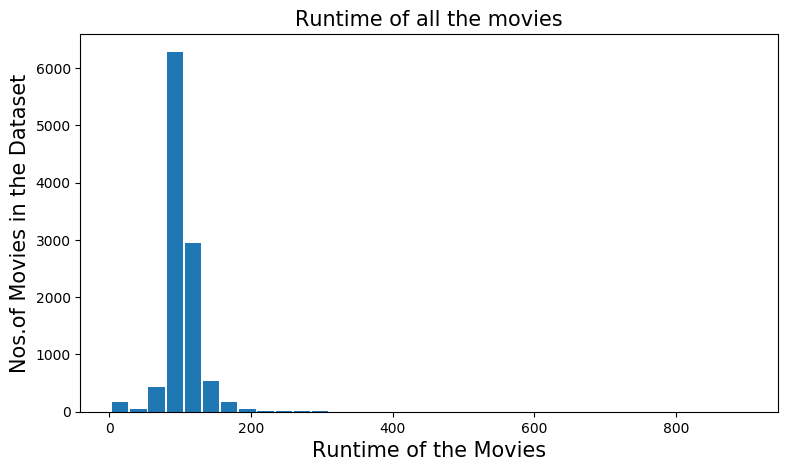

In [24]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

The distribution of the above formed graph is positively skewed or right skewed! Most of the movies are timed between 85 to 110 minutes. Almost 1000 and more no.of movies fall in this criteria.

Lets analyse more about runtime of the movie using different kind of plots i.e Box Plot

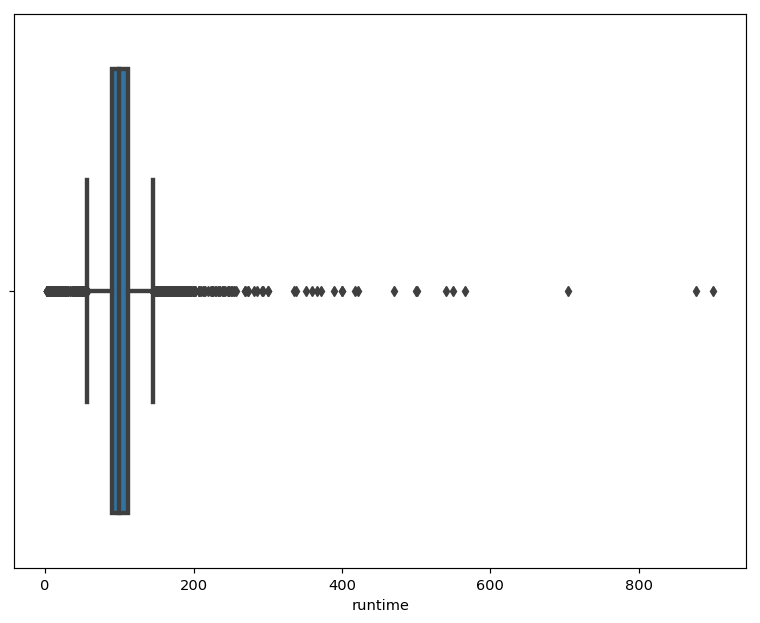

In [25]:
import seaborn as sns
#The First plot is box plot of the runtime of the movies 
plt.figure(figsize=(9,7), dpi = 105)

#using seaborn to generate the boxplot
sns.boxplot(df['runtime'], linewidth = 3)
#diplaying the plot
plt.show()

# Research Question 6 : Year of release vs Profitability

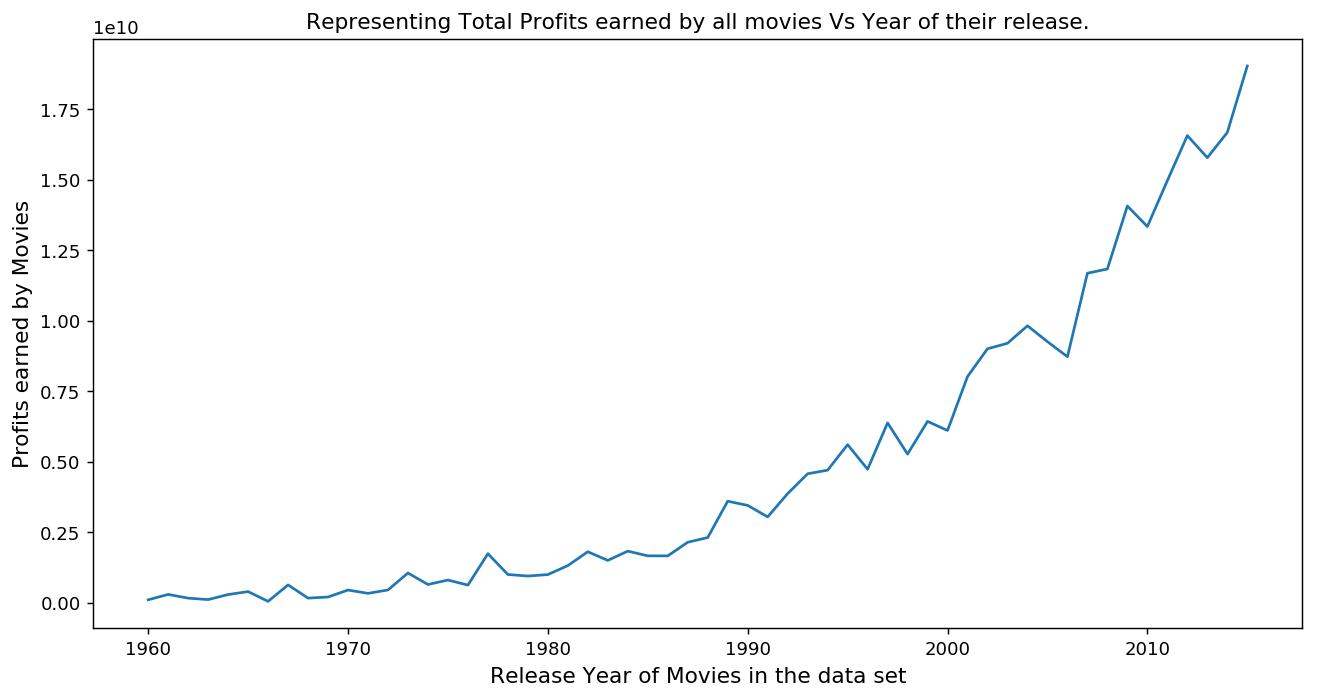

In [26]:
#We will be using Line plot for this analysis
#Since we want to know the profits of movies for every year therefore we have to sum up all the movies of a particular year

profits_year = df.groupby('release_year')['profit_earned'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

In [27]:
#To find that which year made the highest profit?
profits_year.idxmax()

2015

So we can conclude both graphically as well as by calculations that year 2015 was the year where movies made the highest profit.

We are now done with analysing the given dataset.We will now find characteristics of profitable movies.

With respect to the profitable movies
Before moving further we need to clean our data again. We will be considering only those movies who have earned a significant amount of profit.

So lets fix this amount to 50 million dollar.

In [28]:
#selecting the movies having profit $50M or more
profit_data = df[df['profit_earned'] >= 50000000]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

#printing the changed dataset
profit_data.head(3)

,id,popularity,profit_earned,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
1,135397,32.985763,1.363529e+09,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06-09-2015,5562,6.5,2015
2,76341,28.419936,2.284364e+08,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
3,262500,13.112507,1.852382e+08,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015


In [29]:
#counting the no.of rows in the new data base
len(profit_data)

1338

So our dataset is reduced to 1338 from 3853 (in earlier case)

# Research Question 6 : Succesful Genres

In [30]:
#function which will take any column as argument from and keep its track 
def data(column):
    #will take a column, and separate the string by '|'
    data = profit_data[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [31]:
#variable to store the retured value
count = data('genres')
#printing top 5 values
count.head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

Lets to a graphical analysis of the above collected data.

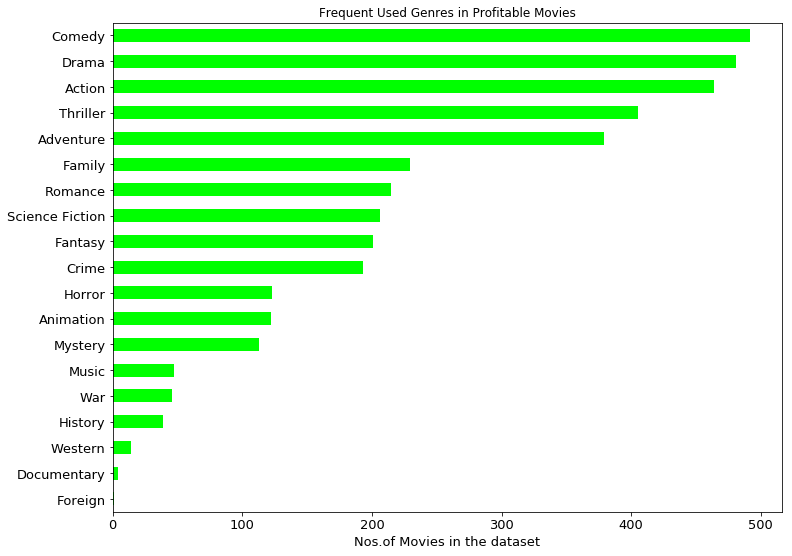

In [32]:
#lets plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = True, inplace = True)

#ploting
lt = count.plot.barh(color = '#00FF00', fontsize = 13)

#title
lt.set(title = 'Frequent Used Genres in Profitable Movies')

# on x axis
lt.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

# Research Question 7 : Most Frequent Cast

In [33]:
#variable to store the retured value
count = data('cast')
#printing top 5 values
count.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

As expecteted Tom Cruise is on the top with total 27 cast followed by Brad Pitt with 25 and Tom Hanks with 22.

# Research Question 8 : Average Budget of the movies

In [34]:
#New function to find average 
def profit_avg(column):
    return profit_data[column].mean()

In [35]:
# calling the above function for budget
profit_avg('budget')

60444957.76083707

So the movies having profit of 50 million dollar and more have an average budget of 60 million dollar.

# Research Question 9 : Average Revenue earned by the movies


In [36]:
# calling the above function for revenue
profit_avg('revenue')

254957662.59491777

So the movies having profit of 50 million dollar and more have an average revenue of 255 million dollar.

# Research Question 10 : Average duration of the movies

In [37]:
# calling the above function for 
profit_avg('runtime')

113.66741405082212

So the movies having profit of 50 million dollar and more have an average duration of 113 minutes.

<a id='conclusions'></a>
## Conclusions

This was a very interesting data analysis. We came out with some very interesting facts about movies. After this analysis we can conclude following:

For a Movie to be in successful criteria

1.Average Budget must be around 60 millon dollar

2.Average duration of the movie must be 113 minutes

3.Any one of these should be in the cast :Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone,Cameron Diaz

4.Genre must be : Action, Adventure, Thriller, Comedy, Drama.

By doing all this the movie might be one of the hits and hence can earn an average revenue of around 255 million dollar.

Limitations: This analysis was done considering the movies which had a significant amount of profit of around 50 million dollar. This might not be completely error free but by following these suggestion one can increase the probability of a movie to become a hit.I have found the results of popular movies,popular cast based on popularity score,budget,revenue,average votes received but the analysis could have been more informative if data also has details of awards received by actors or actress

Data doesn't contain any information such as movies recommended for kids,providing this data could have been useful to get information about movies,cast & genres which are famous among kids.

We can do additional research on Tagline & overview of movies to understand how movies emotion changes according to genres.